In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt 
import scipy 

from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import Markdown as md

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')

true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
data_waiting = df[df != 108.0]

xlimit = (1., 310.)
plot_pts_cnt = 3000
new_data = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt)

### Fixed contaminated observation, varying lambda

In [3]:
bw = 5.
log_pen_param_list = np.concatenate((np.arange(-20., -10., 1), np.arange(-10., 1.5, 0.5)))
kernel_type = 'gaussian_poly2'
contam_weight = 1e-3
plot_xlimit = (1., 310.)
plot_pts_cnt = 3000
abstol = 0.015
random_seed_list = [1, 202, 3003, 40004, 19891119]
contam_pt = 150.

In [4]:
result_dict = {}

-20.0


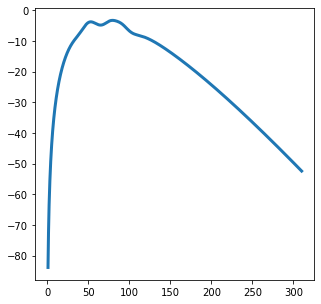

-19.0


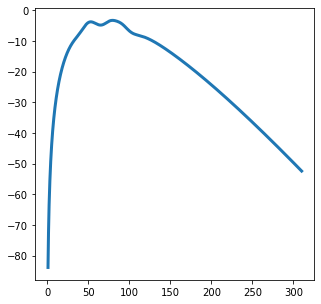

-18.0


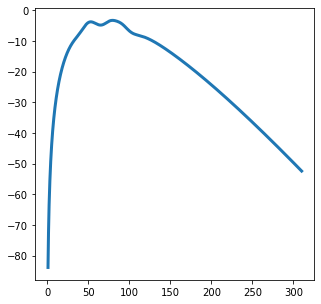

-17.0


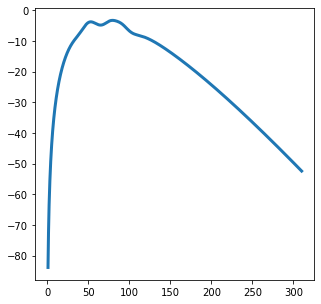

-16.0


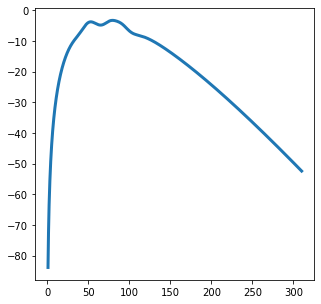

-15.0


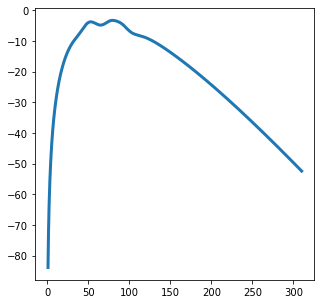

-14.0


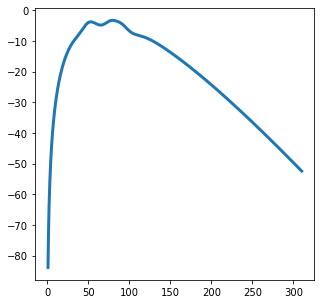

-13.0


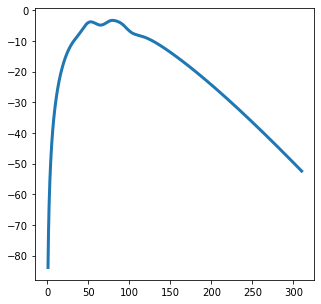

-12.0


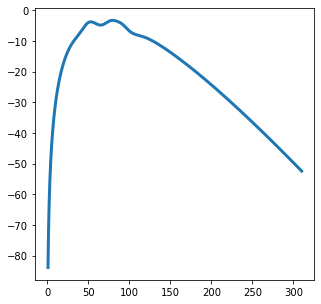

-11.0


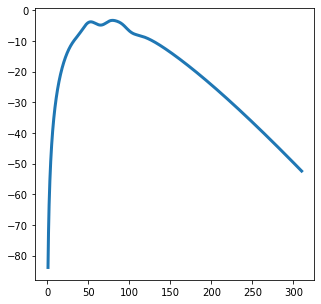

-10.0


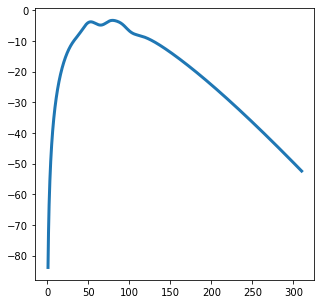

-9.5


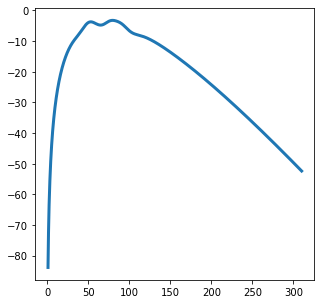

-9.0


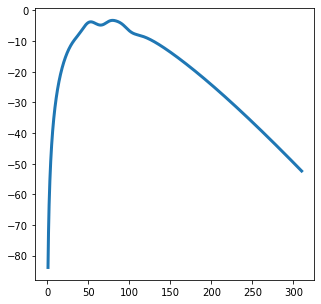

-8.5


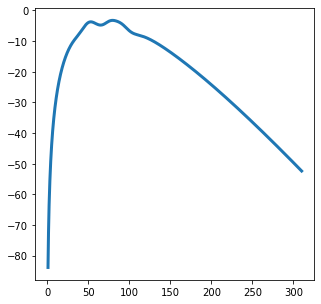

-8.0


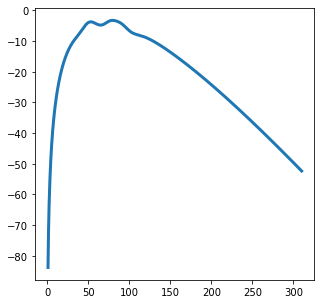

-7.5


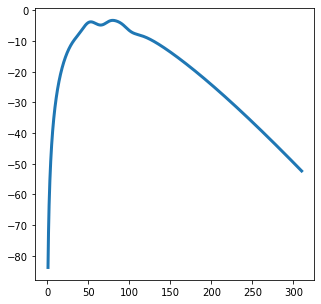

-7.0


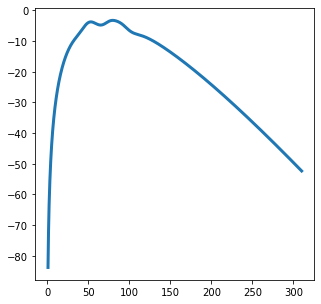

-6.5


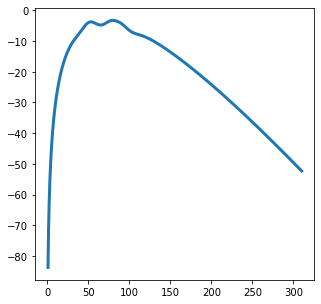

-6.0


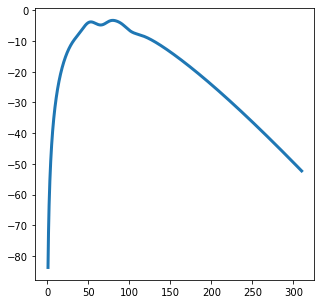

-5.5


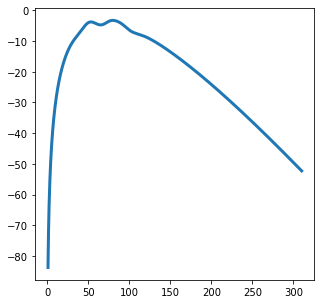

-5.0


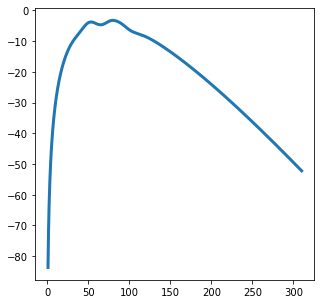

-4.5


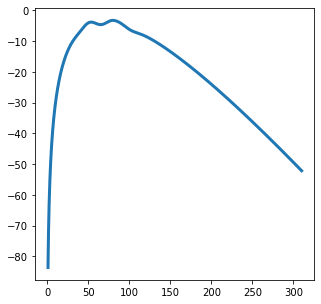

-4.0


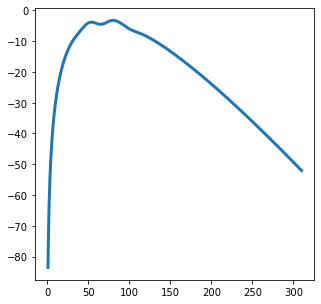

-3.5


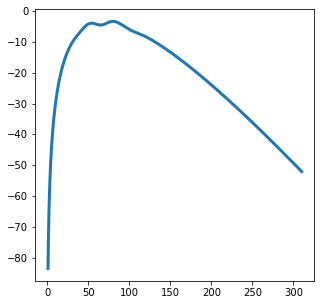

-3.0


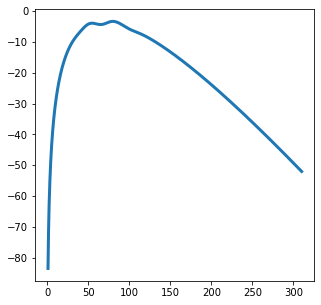

-2.5


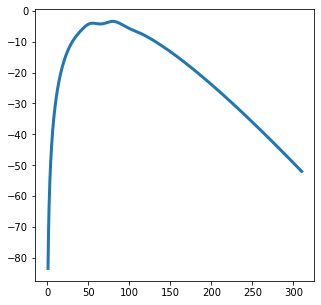

-2.0


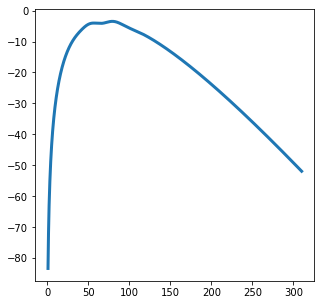

-1.5


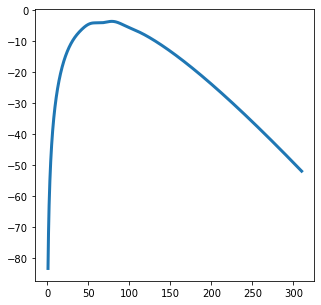

-1.0


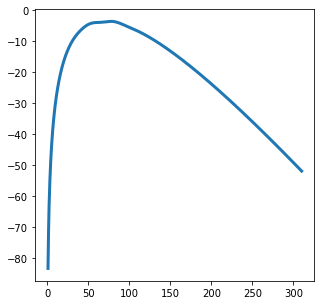

-0.5


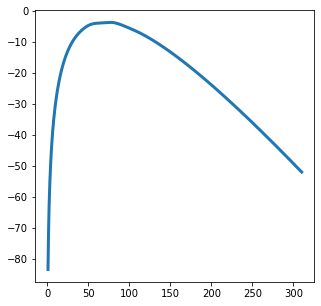

0.0


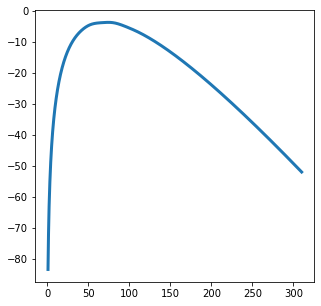

0.5


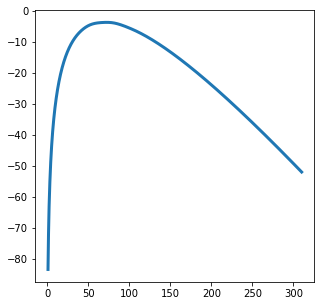

1.0


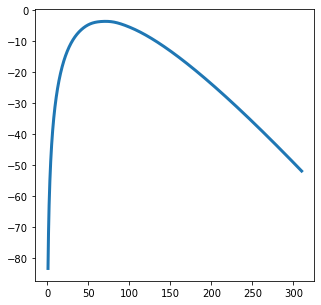

In [5]:
for log_pen_param in log_pen_param_list: 
    
    print(log_pen_param)
    
    for seed in random_seed_list: 
        
        dir_name = (f'data/PenML-GD-ContamData={contam_pt}-basisn=310-bw={bw}-' + 
                f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                f'plotdomain={plot_xlimit}-plotcnts={plot_pts_cnt}-seed={seed}')

        if seed == 1: 

            result = np.load(dir_name + f'/logpenparam={log_pen_param}-uncontam-logden-newdata.npy')

        else: 

            result += np.load(dir_name + f'/logpenparam={log_pen_param}-uncontam-logden-newdata.npy')

    avg_save_dir_name = (f'data/PenML-GD-ContamData={contam_pt}-basisn=310-bw={bw}-' + 
                             f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                             f'plotdomain={plot_xlimit}-plotcnts={plot_pts_cnt}-AVG')

    if not os.path.isdir(avg_save_dir_name):
        os.mkdir(avg_save_dir_name)
        
    result /= len(random_seed_list)
    
    plt.figure(figsize = (5, 5))
    plt.plot(new_data, result, color = 'tab:blue', lw = 3.)
    plt.show()
    
    np.save(avg_save_dir_name + f'/logpenparam={log_pen_param}-uncontam-logden-newdata.npy', result)
    

-20.0


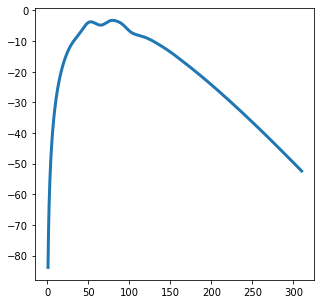

-19.0


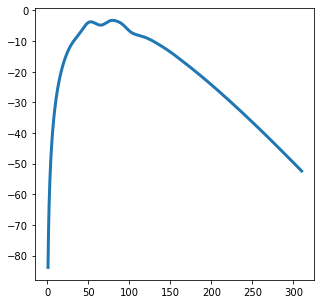

-18.0


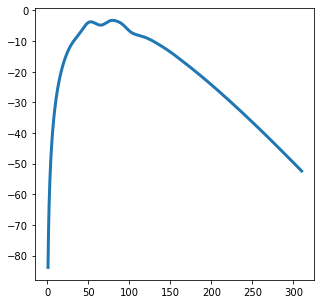

-17.0


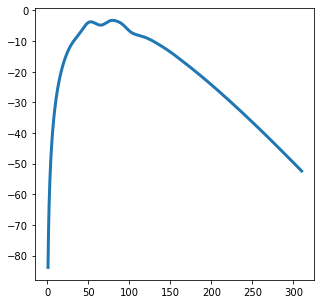

-16.0


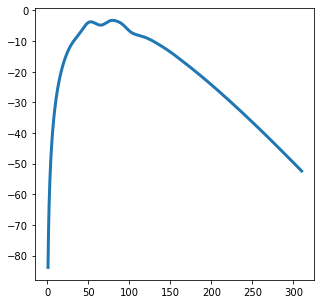

-15.0


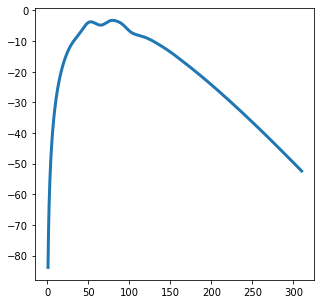

-14.0


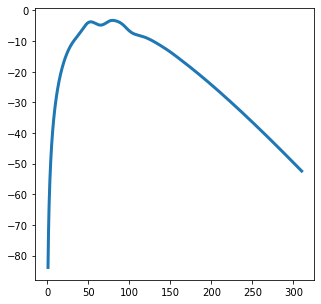

-13.0


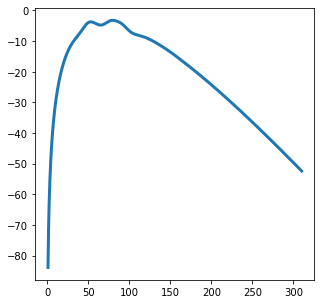

-12.0


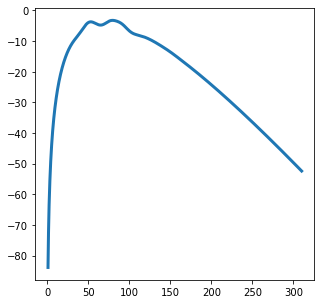

-11.0


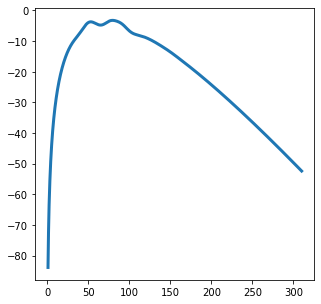

-10.0


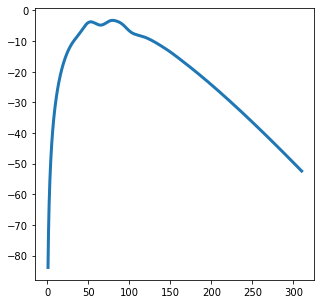

-9.5


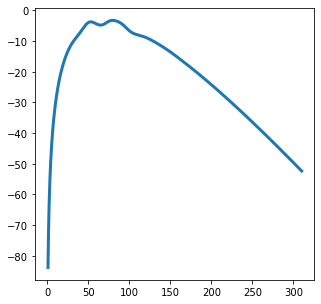

-9.0


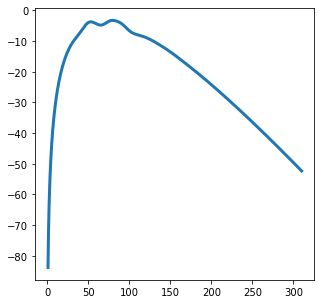

-8.5


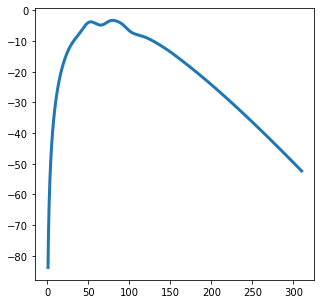

-8.0


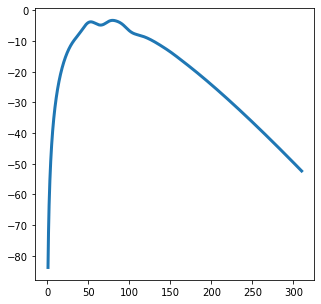

-7.5


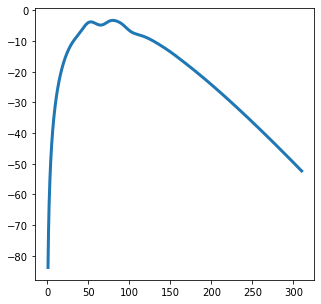

-7.0


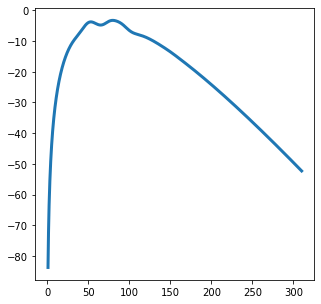

-6.5


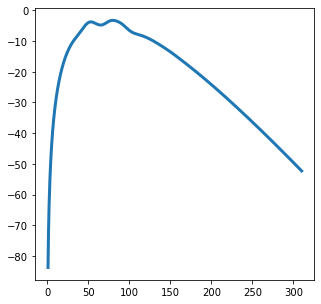

-6.0


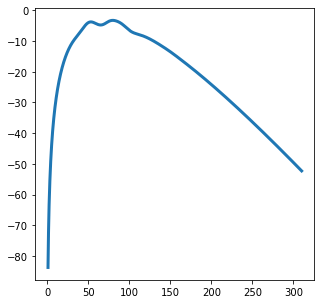

-5.5


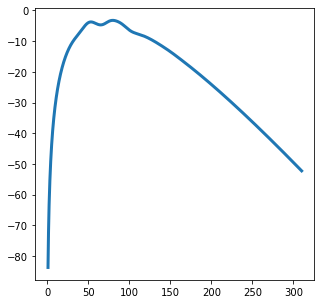

-5.0


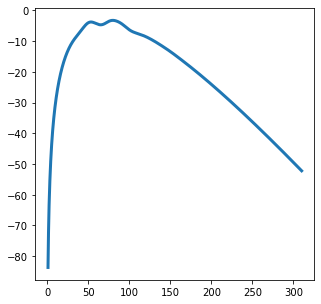

-4.5


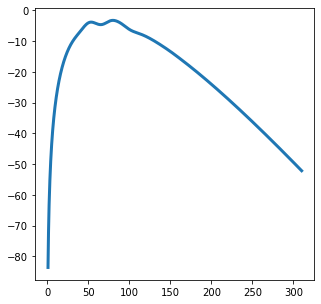

-4.0


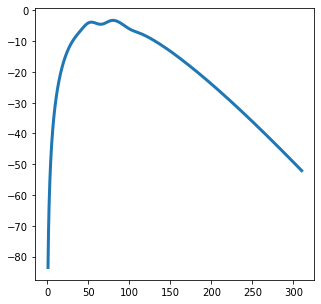

-3.5


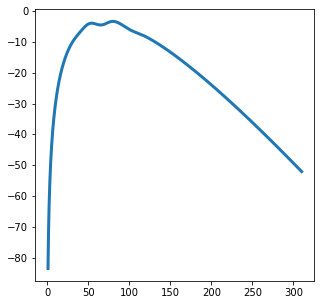

-3.0


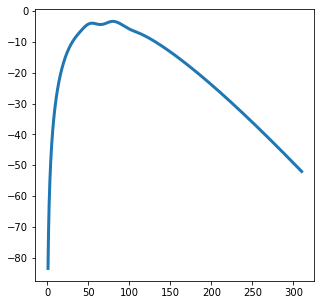

-2.5


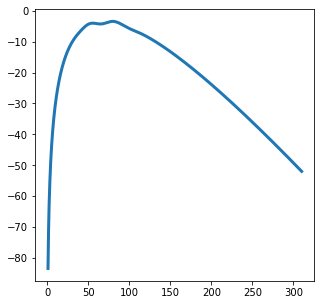

-2.0


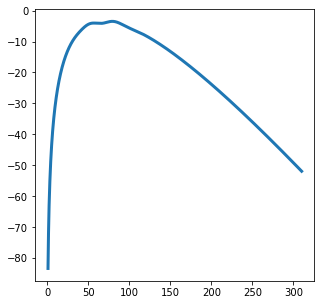

-1.5


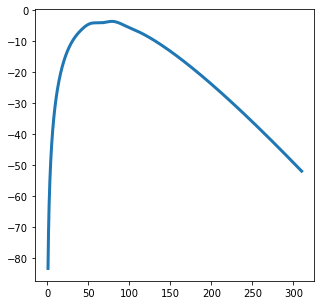

-1.0


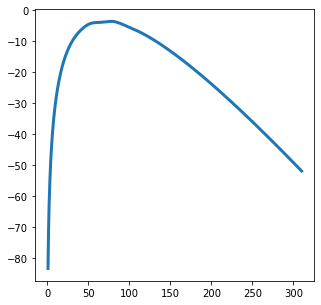

-0.5


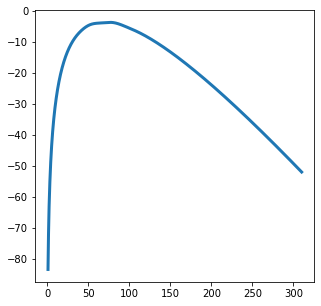

0.0


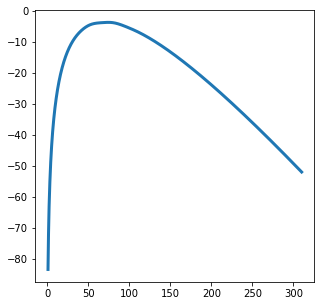

0.5


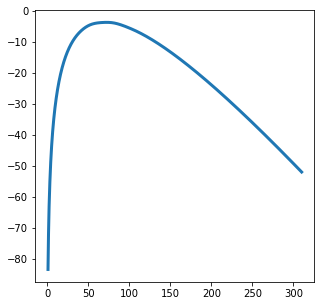

1.0


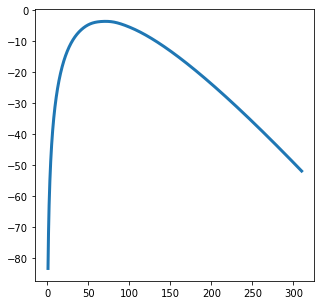

In [6]:
for log_pen_param in log_pen_param_list: 
    
    print(log_pen_param)
        
    for seed in random_seed_list: 
        
        dir_name = (f'data/PenML-GD-ContamData={contam_pt}-basisn=310-bw={bw}-' + 
                f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                f'plotdomain={plot_xlimit}-plotcnts={plot_pts_cnt}-seed={seed}')

        if seed == 1: 

            result = np.load(dir_name + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy')

        else: 

            result += np.load(dir_name + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy')

    avg_save_dir_name = (f'data/PenML-GD-ContamData={contam_pt}-basisn=310-bw={bw}-' + 
                         f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                         f'plotdomain={plot_xlimit}-plotcnts={plot_pts_cnt}-AVG')

    result /= len(random_seed_list)
    
    plt.figure(figsize = (5, 5))
    plt.plot(new_data, result, color = 'tab:blue', lw = 3.)
    plt.show()
    np.save(avg_save_dir_name + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy', result)
    

In [10]:
avg_IF_sup = []

for log_pen_param in log_pen_param_list: 
    
    avg_save_dir_name = (f'data/PenML-GD-ContamData={contam_pt}-basisn=310-bw={bw}-' + 
                         f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                         f'plotdomain={plot_xlimit}-plotcnts={plot_pts_cnt}-AVG')
    
    uncontam_logden = np.load(avg_save_dir_name + f'/logpenparam={log_pen_param}-uncontam-logden-newdata.npy')
    contam_logden = np.load(avg_save_dir_name + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy')

    IF_vals = (contam_logden - uncontam_logden) / contam_weight
    avg_IF_sup.append(np.max(np.abs(IF_vals)))

    np.save(avg_save_dir_name + f'/logpenparam={log_pen_param}-IF-newdata.npy', result)
    

In [11]:
avg_IF_sup

[93.88409496336081,
 93.88408086758382,
 93.88404255130567,
 93.88393839697251,
 93.88365527692777,
 93.88288568260705,
 93.88079375096936,
 93.87510760608997,
 93.8596533881988,
 93.81766165281746,
 93.70364314437829,
 87.4066303382115,
 87.2382314866762,
 86.96154262404399,
 86.50793953337477,
 76.81070806627588,
 72.98412507562091,
 62.67737791548633,
 66.99467745579923,
 60.155093382460834,
 51.672691416962735,
 38.33416159411129,
 27.389457599992895,
 22.033226217860857,
 16.187701420339096,
 11.030263548605035,
 7.384219519286361,
 4.900650392226424,
 2.974100720054551,
 1.8848300414511243,
 1.171149940111249,
 0.7032442731595978,
 0.4381534107995577]

In [ ]:
avg_dir_name = (f'data/PenML-Newton-ContamData={contam_pt}-basisn=205-bw={bw}-' + 
                f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-AVG')
if not os.path.isdir(avg_dir_name):
    os.mkdir(avg_dir_name)
np.save(avg_dir_name + '/logpenparam=-10.5-uncontam-logden-newdata.npy', result)

In [ ]:
base_density = BasedenGamma(data_waiting)

newx = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt)
base_den_vals = base_density.baseden_eval(newx).flatten()

plt.figure(figsize=(20, 10))
plt.plot(newx, np.exp(result), 'g-', label = '0.01')
#plt.hist(data_waiting.flatten(), density = True, color = 'tab:blue', bins = 'fd', alpha = 0.5)
plt.show()

In [ ]:
for seed in random_seed_list: 

    dir_name = (f'data/PenML-Newton-ContamData={contam_pt}-basisn=205-bw={bw}-' + 
                f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-seed={seed}')
    
    if seed == 1: 

        result = np.load(dir_name + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy')

    else: 

        result += np.load(dir_name + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy')

result /= len(random_seed_list)

dir_name1 = (f'data/PenML-Newton-ContamData={contam_pt}-basisn=205-bw={bw}-' + 
                f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-AVG')

np.save(dir_name1 + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy', result)

In [ ]:
# compute the influence function 
dir_name = (f'data/PenML-Newton-ContamData={contam_pt}-basisn=205-bw={bw}-' + 
                f'kernel={kernel_type}-contamweight={contam_weight}-' + 
                f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-AVG')
uncontam_result = np.load(dir_name + f'/logpenparam={log_pen_param}-uncontam-logden-newdata.npy')
contam_result = np.load(dir_name + f'/logpenparam={log_pen_param}-contam-logden-newdata.npy')
IF_result = (contam_result - uncontam_result) / contam_weight

np.save(dir_name + f'/logpenparam={log_pen_param}-IF-logden-newdata.npy', IF_result)

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(newx, IF_result, 'g-', lw = 3.)
#plt.hist(data_waiting.flatten(), density = True, color = 'tab:blue', bins = 'fd', alpha = 0.5)
plt.show()

In [ ]:
bw_list = [5.0]
log_pen_param_list = [-10.0]
output_pd1 = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 

        sup_norm = {}

        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['IFsupnorm'] = []

        dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/ML-basisn=205-bw={bw}-' + 
                    f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                    f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={abstol}-stepsize={1.0}-AVG')

        for contam_data in contam_data_list: 

            sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm'].append(np.max(np.abs(sub_df)))    

        output_pd1 = pd.concat([output_pd1, pd.DataFrame(sup_norm)])

# output_pd1.sort_values(['contam_data'], inplace = True)
output_pd1

In [ ]:
output_pd1.to_csv(f'data/ML-IF-avg-logden-first.csv')

In [ ]:
label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'

plt.figure(figsize = (10, 10))
plt.plot(output_pd1.contam_data, output_pd1.IFsupnorm, color = 'tab:red', linewidth = linewidth)
plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
plt.tick_params('both', labelsize = tick_fontsize)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
plt.savefig('plots/ML-averaging-IFsupnorm.pdf')
plt.show()

In [ ]:
%matplotlib qt
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
data_waiting = df[df != 108.0]

xlimit = (1., 410.)
plot_pts_cnt = 3000
newx = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt)

contam_data_array = np.arange(2., 410., 4).reshape(-1, 1)
# np.sort(np.unique(np.concatenate([np.arange(2., 410., 4), np.arange(40., 100., 2)]))).reshape(-1, 1)
# np.sort(np.concatenate([np.arange(90., 401., 4.), np.unique(data_waiting)])).reshape(-1, 1)
contam_weight = 0.01

kernel_type = 'gaussian_poly2'
bw = 5.0
log_pen_param = -10.0
ylimit = (-29., 29.)

var_name = 'additional observation'
method = 'ML'

fontsize_label = 15
fontsize_tick = 10
fontsize_info = 20
fontsize_title = 20
fontsize_suptitle = 22
linewidth = 2.0

fig, ax = plt.subplots(
    nrows = 1, 
    ncols = 1, 
    figsize = (20, 10), 
    # tight_layout = True, 
    constrained_layout = False)

fig.subplots_adjust(top=0.9)

def update_IF_plots(contam_data): 

    # read in the original data 
    true_data = np.load('data/geyser.npy').astype(np.float64)
    df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
    df = df[df != 108.0]
    
    pddf = pd.DataFrame({'data': df.flatten()})
    
    ax.clear()
    
    # ---------------------------------------------------------------------------------------
    # set x-limit 
    ax.set_xlim(xlimit)
    # set x label 
    ax.set_xlabel(var_name, fontsize = fontsize_label)
    # set y label 
    ax.set_ylabel('IF', fontsize = fontsize_label)
    ax.set_ylim(ylimit)
    # formatting tick marks and tick labels 
    ax.tick_params(axis = 'both', labelsize = fontsize_tick)
    ax.ticklabel_format(axis = 'y')
    # add rug plot at normal observations 
    sns.rugplot(pd.Series(df.flatten()), ax = ax, color = 'tab:blue')
    sns.rugplot(pd.Series(contam_data), ax = ax, color = 'red')
    
    dir_name = (f'data/{method}-basisn=205-bw={bw}-' + 
                f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={abstol}-AVG')
    result = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
    # plot density when the basis functions are centered at grid points 
    ax.plot(newx.flatten(), result.flatten(), color = 'tab:blue', 
            linestyle = 'solid', linewidth = linewidth, label = 'IF of Log-density')
    # plt.legend(fontsize = fontsize_info, loc = 'upper right')
    
    # draw a vertical line at the outlier 
    ax.axvline(contam_data, 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)

    # add plot information 
    info = f'Add {contam_data[0]}'
    ax.text(0.007, 0.988,
            info,
             fontsize = fontsize_info,
             # fontfamily = 'serif',
             multialignment = 'left',
             horizontalalignment = 'left',
             verticalalignment = 'top',
             transform = ax.transAxes,
             bbox = {'facecolor': 'none',
                     'boxstyle': 'Round, pad=0.2'})
    
    return ax

ani = FuncAnimation(
    fig, 
    update_IF_plots, 
    frames = contam_data_array, 
    interval = 200)

fig.suptitle(r'Influence Function of Maximum Likelihood Log-density with $\sigma$={bw} and $\lambda$=exp({pen})'.format(
    bw=bw, pen=log_pen_param), 
             fontsize = fontsize_suptitle, y = 0.98)

# uncomment the following line to save the gif
# ani.save(f'gif/{method}-IF-logdensity-limit-waiting-kernel={kernel_type}-bw={bw}-pen=exp{log_pen_param}-contamweight={contam_weight}.gif', writer='imagemagick')

plt.show()

## Averaging the IF sup norm directly 

In [ ]:
seed = 2010
bw = 5.0
kernel_type = 'gaussian_poly2'
log_pen_param = -10.0
contam_weight = 0.01
xlimit = (1., 410.)
plot_pts_cnt = 3000
abstol = 0.015

dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/ML-basisn=205-bw={bw}-' + 
            f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
            f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={abstol}-seed={seed}')

result = []
for contam_data in contam_data_list: 
    sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
    result.append(np.max(np.abs(sub_df)))

plt.figure(figsize = (10, 10))
plt.plot(contam_data_list, result, color = 'tab:blue')

In [ ]:
bw_list = [5.0]
log_pen_param_list = [-10.0]
output_pd2 = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        
        sup_norm = {}

        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['IFsupnorm'] = []
        
        for contam_data in contam_data_list: 
            
            result = 0
            for seed in random_seed_list: 
                
                dir_name = (f'/Users/chenxizhou/Desktop/data/ML-basisn=205-bw={bw}-' + 
                            f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                            f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-stepsize={1.0}-abstol={abstol}-seed={seed}')
                sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
                result += np.max(np.abs(sub_df))
#                 print(np.max(np.abs(sub_df)))
#                 print(result)
            
            sup_norm['IFsupnorm'].append(result / len(random_seed_list))
        
        output_pd2 = pd.concat([output_pd2, pd.DataFrame(sup_norm)])

# output_pd2.sort_values(['contam_data'], inplace = True)
output_pd2

In [ ]:
output_pd2.to_csv('ML-averaged-IF-supnorms.csv')

In [ ]:
output_pd2 = pd.read_csv('data/ML-averaged-IF-supnorms.csv')

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'

%matplotlib inline
plt.figure(figsize = (10, 10))
plt.plot(output_pd2.contam_data, output_pd2.IFsupnorm, color = 'tab:red', linewidth = linewidth)

plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
plt.tick_params('both', labelsize = tick_fontsize)
# plt.title('Sup-norm of Influence Function of Maximum Likelihood \n Log-density Estimate ' + r'($\sigma$={bw}, $\lambda$={logpen})'.format(bw = bw, logpen = log_pen_param), fontsize = fontsize_title)

plt.savefig('plots/ML-IF-averaged-supnorm.pdf')

In [ ]:
output_pd_sub = output_pd2
# output_pd_sub = output_pd[(output_pd.bw == bw) & (output_pd.loglambda == loglambda)]
output_pd_sub1 = output_pd_sub[(40. <= output_pd_sub.contam_data) & (output_pd_sub.contam_data <= 100.)]
output_pd_sub2 = output_pd_sub[(40. > output_pd_sub.contam_data) | (output_pd_sub.contam_data > 100.)]
scipy.stats.ks_2samp(output_pd_sub1.IFsupnorm, output_pd_sub2.IFsupnorm)

In [ ]:
output_pd_sub1

In [ ]:
output_pd_sub2